# Линейная регрессия

## Лабораторная работа №2


---

**Впишите в эту ячейку ваши ФИО, группу и вариант**.

ФИО: Шурова Дарья Сергеевна

Группа: 221-328

Вариант: 2

---

Далее по ходу ноутбука вам встрется ячейки с кодом, в которых будут комментарии с заданиями, и текстовые ячейки как эта с вопросами, на которые вам необходимо письменно в ноутбуке ответить.

Все ячейки необходимо запускать.

Данные для вариантов лежат по ссылкам:

1. http://labcolor.space/linreg-1.csv
1. http://labcolor.space/linreg-2.csv

Скопируйте ссылку для своего варианта.

### Импортирование модулей для выполнения работы

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 12, 5

In [14]:
# Из соответствующего модуля библиотеки sklearn импортируйте класс нужной модели

from sklearn.linear_model import LinearRegression

## Чтение данных и краткий анализ

In [15]:
# Используя метод read_csv() из Pandas считайте данные для вашего варианта.


df = pd.read_csv('http://labcolor.space/linreg-2.csv')


In [16]:
df.shape

(50, 2)

In [17]:
# Используя методы describe(), head() просмотрите ваши данные.

#
df.head()
#

,X,y
0,27.270542,27.658164
1,50.827003,8.665420
2,54.765266,6.435308
3,39.892999,16.471261
4,33.835642,19.929357


In [18]:
df.describe()

,X,y
count,50.000000,50.000000
mean,36.364100,21.369607
std,16.982718,19.371131
min,-1.175515,-1.708287
25%,27.662211,9.824413
50%,36.201444,19.549988
75%,49.112110,27.144644
max,66.189594,97.625302


**Сколько объектов есть в вашем наборе данных?**

Ответ: 50

**Сколько и каких признаков у ваших объектов?**

Ответ: 2

## Проверка на отсутствующие значения

Используя метод isnull() датафрейма (df) проверьте есть ли отсутствующие значения в ваших данных.

In [19]:
#
df.isnull().sum()
#

X    0
y    0
dtype: int64

Если в вашем наборе данных есть пропуски, то удалите эти образцы используя метод dropna().

In [20]:
#
df.dropna()
#

,X,y
0,27.270542,27.658164
1,50.827003,8.665420
2,54.765266,6.435308
3,39.892999,16.471261
4,33.835642,19.929357
5,50.353426,7.117258
6,45.463237,12.364519
7,34.774614,20.800752
8,-0.897306,46.989061
9,-0.800146,96.233243


**Сколько объектов было удалено?**

Ответ: 0

Используя метод pop() разделите ваши зависимые и независимые переменные - X, y

In [21]:
y =  df.pop('y')
X =  df

Далее используя метод train_test_split() разделите данные на обучающую и проверочную части. В тестовую часть выделите 20% ваши данных и укажите random_state для воспроизводимости вашего результата.

In [28]:
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#

## Обучение без обработки

In [29]:
# Создайте объект модели линейной регрессии

regr =  LinearRegression()

# Обучите модель с использованием обучающего набора

regr.fit(X_train, y_train)

# Сделайте прогноз используя полученную модель

y_pred = regr.predict(X_test)

In [30]:
print('параметр a:', regr.intercept_)
print('параметр b:', regr.coef_)

параметр a: 61.080779624549805
параметр b: [-1.07516796]


**Сколько параметров в вашей модели линейной регрессии?**

Ваш ответ: 2 параметра

Сравните спрогнозированные значения с тестовыми с помощью средней квадратичной ошибки и коэффициент детерминации.

In [31]:
# В функции требуется передать нужные данные
print(f"Средняя квадратичная ошибка {mean_squared_error(y_test, y_pred):.2f}")
print(f"Коэффициент детерминации {r2_score(y_test, y_pred):.2f}")

Средняя квадратичная ошибка 36.05
Коэффициент детерминации 0.71


Визуализация результатов.

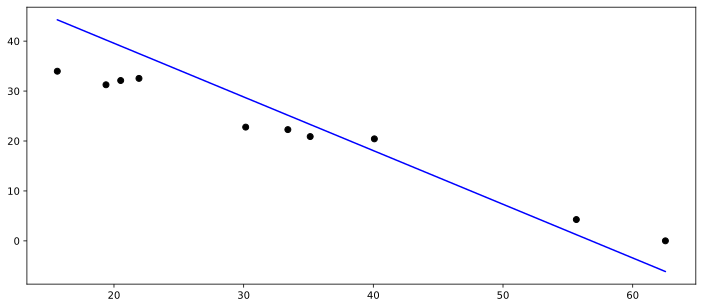

In [32]:
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_pred, color="blue")

## Удаление выбросов

Для удаления выбросов воспользуемся z-оценкой.

$z_i = \frac{x_i - \mu}{\sigma}$, где

$\mu$ - cреднее значение, $\sigma$ - стандартное отклонение.

In [33]:
# Используя метод read_csv() из Pandas повторно считайте данные для вашего варианта.

#
df_2 = pd.read_csv('http://labcolor.space/linreg-2.csv')
#

<Axes: >

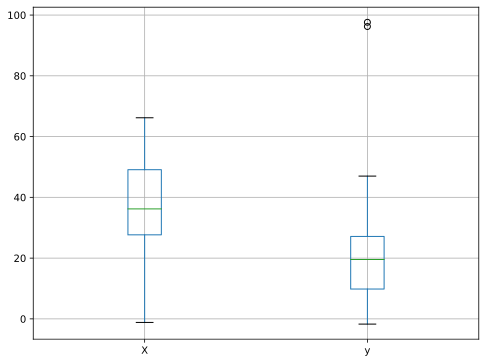

In [34]:
plt.figure(figsize=(8, 6))
df_2.boxplot(column=['X', 'y'])

С помощью np.mean() и np.std() рассчитайте $\mu$ - cреднее значение, $\sigma$ - стандартное отклонение.

In [35]:
mean = np.mean(df_2['y'])
std = np.std(df_2['y'])

In [40]:
print('mean:', mean)
print('std:', std)

mean: 21.36960702339194
std: 19.176441497249016


Добавляем к нашим данным новую колонку z-score.

In [43]:
df_2["z-score"] = df_2.apply(lambda y: (y['y'] - mean) / std, axis=1)

**Опишите что такое lambda в python**

Ваш ответ: Это выражение для создания аннонимных функций, без привязки к имени.

Если z-оценка больше +3 или меньше -3, то данное значение считаем выбросом и удаляем его из наших данных.

In [48]:
df_2 = df_2.loc[(df_2['z-score'] <= 3) & (df_2['z-score'] >= -3)]

In [49]:
df_2.shape

(48, 3)

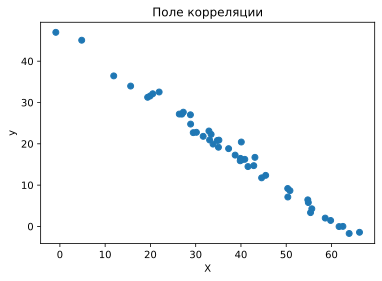

In [50]:
plt.figure(figsize=(6, 4))
plt.title('Поле корреляции')
plt.xlabel('X')
plt.ylabel('y')
plt.scatter(df_2['X'], df_2['y'])

**В чем заключается идея z-оценки и что подразумевает диапазон от -3 до 3?**

Ваш ответ: Z-оценка — это стандартизированное значение, которое показывает, насколько далеко от среднего значения отклоняется конкретное значение в наборе данных.  Если z-оценка входит в диапазон от -3 до 3 то данное значение не является выбросом. Диапазон от -3 до 3 для z-оценки означает, что значение отклоняется от среднего значения на три стандартных отклонения в любую сторону.

**Сколько значений было удалено как выбросы?**

Ваш ответ: 2

## Обучение после обработки

In [51]:
df_2.drop('z-score', axis= 1 , inplace= True)

In [52]:
df_2.shape

(48, 2)

In [53]:
y = df_2.pop('y')
X = df_2

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
# Создайте объект модели линейной регрессии
regr_2 = LinearRegression()

# Обучите модель с использованием обучающего набора
regr_2.fit(X_train, y_train)

# Сделайте прогноз используя полученную модель
y_pred = regr_2.predict(X_test)

In [56]:
print('параметр a:', regr_2.intercept_)
print('параметр b:', regr_2.coef_)

параметр a: 47.11911594244168
параметр b: [-0.76050162]


Как и в разделе обучение без обработки оцените модель регрессии по средней квадратичной ошибке и коэффициенту детерминации.

In [58]:
#
print(f"Средняя квадратичная ошибка {mean_squared_error(y_test, y_pred):.2f}")
print(f"Коэффициент детерминации {r2_score(y_test, y_pred):.2f}")
#

Средняя квадратичная ошибка 1.44
Коэффициент детерминации 0.98


Визуализируйте результат.

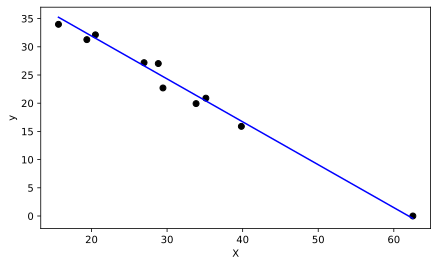

In [60]:
#
plt.figure(figsize=(7, 4))
plt.xlabel('X')
plt.ylabel('y')
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_pred, color="blue")
#

Сравните результаты до работы с выбросами и после.

**Как изменились результаты работы модели после удаления выбросов?**

Ваш ответ: Увеличился коэффициент детерминации и стал 98%, также средняя квадратичная ошибка уменьшилась и стала 1.44. Все это говорит об улучшении качества и точности модели.

**Опишите идею метода наименьших квадратов.**

Ваш ответ: Метод наименьших квадратов — это математический метод, который используется для нахождения наилучшей линии приближения данных. Он минимизирует сумму квадратов отклонений точек данных от линии регрессии.